# Kerninghan - Lin Algorithm for VLSI CAD Partitioning

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.adj_list = []
        self.nodes = []
        self.num_nodes = 0
        self.node_affiliation = {}
    
    def addNode(self, node, affiliation):
        self.num_nodes += 1
        self.nodes.append(node)
        self.node_affiliation[node] = affiliation

    def addEdge(self, a, b, w):
        if(a in self.nodes and b in self.nodes):
            t, l = (min(a,b), max(a,b))
            for i in range(len(self.adj_list)):
                if(self.adj_list[i][0] == t and self.adj_list[i][1] == l):
                    self.adj_list[i][2] += w
                    return
            self.adj_list.append([t, l, w])
        else:
            print("This node is not declared")
    
    def get_cost(self):
        cost = 0
        d = self.node_affiliation
        for i in self.adj_list:
            if(d[i[0]] != d[i[1]]):
                cost += i[2]
        return cost

    def IE(self, node):
        #(internal, external) cost of nodes
        internal, external = 0, 0
        d = self.node_affiliation
        p = d[node]
        for i in self.adj_list:
            if(i[0] == node):
                if(d[i[1]] != p):
                    external += i[2]
                else:
                    internal += i[2]
            elif(i[1] == node):
                if(d[i[0]] != p):
                    external += i[2]
                else:
                    internal += i[2]
            else:
                pass
        return (internal, external)

class GraphVisualizer:
    def __init__(self):
        self.G = nx.Graph()

    def addEdges(self, graph):
        self.graph = graph
        for i in graph.adj_list:
            self.G.add_edge(i[0], i[1], weight=i[2])
        
    def visualize(self, text="Network Visualized"):
        nodes = self.graph.nodes
        p1 = [i for i in nodes if self.graph.node_affiliation[i] == 'p1']
        colors = ['red' if n in p1 else 'green' for n in list(self.G.nodes)]
        pos = nx.planar_layout(self.G)
        nx.draw_networkx(self.G, pos, node_color = colors)
        labels = nx.get_edge_attributes(self.G, 'weight')
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.title(text)
        plt.show()

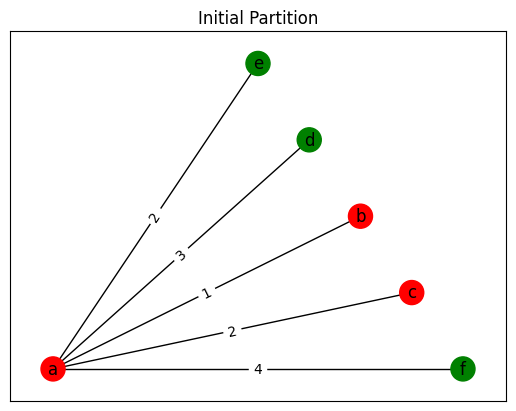

The wire cost of partitioning is 9
internal, external costs of the node 'a' (3, 9)


In [2]:
graph = Graph()
graph.addNode('a', 'p1')
graph.addNode('b', 'p1')
graph.addNode('c', 'p1')
graph.addNode('d', 'p2')
graph.addNode('e', 'p2')
graph.addNode('f', 'p2')

graph.addEdge('a','f', 4)
graph.addEdge('a','e', 2)
graph.addEdge('a','d', 3)

graph.addEdge('a','b', 1)
graph.addEdge('a','c', 2)

gv = GraphVisualizer()
gv.addEdges(graph)
gv.visualize("Initial Partition")

print("The wire cost of partitioning is",graph.get_cost())
print("internal, external costs of the node 'a'", graph.IE('a'))